In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse = "data/mouse_drug_data.csv"
clinical = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse)

clinical_df = pd.read_csv(clinical)

# Merge
merged_data = pd.merge(clinical_df, mouse_df, on="Mouse ID", how="inner")

merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint

meantumor_df = merged_data.loc[:,["Timepoint", "Drug", "Tumor Volume (mm3)"]]

mean_data = meantumor_df.groupby(["Drug", "Timepoint"]).mean()

mean_data.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

standard_error = meantumor_df.groupby(["Drug", "Timepoint"]).sem()

standard_error.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames

reformat_df = standard_error.reset_index()

clean_data = reformat_df.pivot(index="Timepoint", columns="Drug",values="Tumor Volume (mm3)")

clean_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


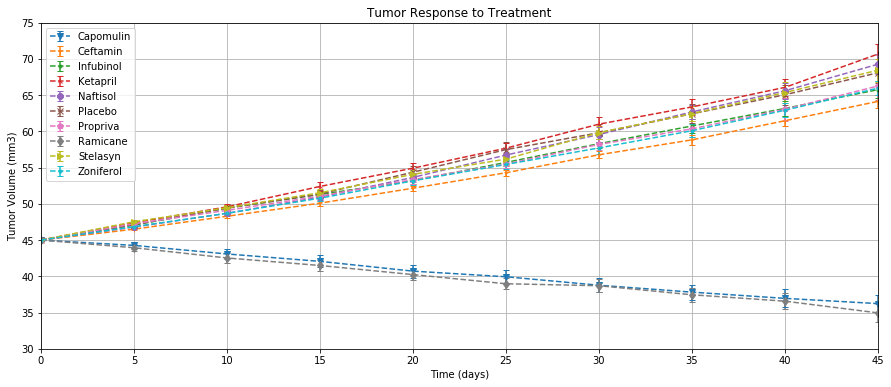

In [5]:
# Generate the Plot (with Error Bars)

plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Capomulin", "Tumor Volume (mm3)"],
             yerr = standard_error.loc["Capomulin", "Tumor Volume (mm3)"], fmt = 'v--', capsize = 3, label = "Capomulin")
plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Ceftamin", "Tumor Volume (mm3)"],
             yerr = standard_error.loc["Ceftamin", "Tumor Volume (mm3)"], fmt = '1--', capsize = 3, label = "Ceftamin")
plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Infubinol", "Tumor Volume (mm3)"],
             yerr = standard_error.loc["Infubinol", "Tumor Volume (mm3)"], fmt = '.--', capsize = 3, label = "Infubinol")
plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Ketapril", "Tumor Volume (mm3)"],
             yerr = standard_error.loc["Ketapril", "Tumor Volume (mm3)"], fmt = '2--', capsize = 3, label = "Ketapril")
plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Naftisol", "Tumor Volume (mm3)"],
             yerr = standard_error.loc["Naftisol", "Tumor Volume (mm3)"], fmt = '8--', capsize = 3, label = "Naftisol")
plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Placebo", "Tumor Volume (mm3)"],
             yerr = standard_error.loc["Placebo", "Tumor Volume (mm3)"], fmt = 'x--', capsize = 3, label = "Placebo")
plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Propriva", "Tumor Volume (mm3)"],
             yerr = standard_error.loc["Propriva", "Tumor Volume (mm3)"], fmt = 'p--', capsize = 3, label = "Propriva")
plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Ramicane", "Tumor Volume (mm3)"],
             yerr = standard_error.loc["Ramicane", "Tumor Volume (mm3)"], fmt = 'd--', capsize = 3, label = "Ramicane")
plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Stelasyn", "Tumor Volume (mm3)"],
             yerr = standard_error.loc["Stelasyn", "Tumor Volume (mm3)"], fmt = '>--', capsize = 3, label = "Stelasyn")
plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Zoniferol", "Tumor Volume (mm3)"],
             yerr = standard_error.loc["Zoniferol", "Tumor Volume (mm3)"], fmt = '.--', capsize = 3, label = "Zoniferol")


# Add legend
plt.legend(loc="best")

# Add gridlines
plt.grid(alpha = 1)

# Add labels
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')

# Add x limits and y limits
plt.xlim(0,45)
plt.ylim(30,75)

plt.gcf().set_size_inches((15, 6))

plt.savefig("TumorResponseToTreatment.png")

# Plot the graph
plt.show()

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
meantumor_df = merged_data.loc[:,["Timepoint", "Drug", "Metastatic Sites"]]

mean_data = meantumor_df.groupby(["Drug", "Timepoint"]).mean()

mean_data.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
standard_error = meantumor_df.groupby(["Drug", "Timepoint"]).sem()

standard_error.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames

reformat_df = standard_error.reset_index()

clean_data = reformat_df.pivot(index="Timepoint", columns="Drug",values="Metastatic Sites")

clean_data.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


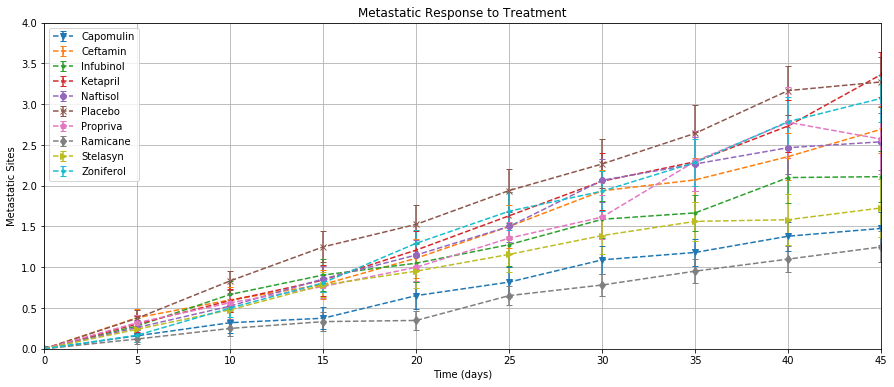

In [9]:
# Generate the Plot (with Error Bars)

plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Capomulin", "Metastatic Sites"],
             yerr = standard_error.loc["Capomulin", "Metastatic Sites"], fmt = 'v--', capsize = 3, label = "Capomulin")
plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Ceftamin", "Metastatic Sites"],
             yerr = standard_error.loc["Ceftamin", "Metastatic Sites"], fmt = '1--', capsize = 3, label = "Ceftamin")
plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Infubinol", "Metastatic Sites"],
             yerr = standard_error.loc["Infubinol", "Metastatic Sites"], fmt = '.--', capsize = 3, label = "Infubinol")
plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Ketapril", "Metastatic Sites"],
             yerr = standard_error.loc["Ketapril", "Metastatic Sites"], fmt = '2--', capsize = 3, label = "Ketapril")
plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Naftisol", "Metastatic Sites"],
             yerr = standard_error.loc["Naftisol", "Metastatic Sites"], fmt = '8--', capsize = 3, label = "Naftisol")
plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Placebo", "Metastatic Sites"],
             yerr = standard_error.loc["Placebo", "Metastatic Sites"], fmt = 'x--', capsize = 3, label = "Placebo")
plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Propriva", "Metastatic Sites"],
             yerr = standard_error.loc["Propriva", "Metastatic Sites"], fmt = 'p--', capsize = 3, label = "Propriva")
plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Ramicane", "Metastatic Sites"],
             yerr = standard_error.loc["Ramicane", "Metastatic Sites"], fmt = 'd--', capsize = 3, label = "Ramicane")
plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Stelasyn", "Metastatic Sites"],
             yerr = standard_error.loc["Stelasyn", "Metastatic Sites"], fmt = '>--', capsize = 3, label = "Stelasyn")
plt.errorbar(np.arange(0, 50, 5), mean_data.loc["Zoniferol", "Metastatic Sites"],
             yerr = standard_error.loc["Zoniferol", "Metastatic Sites"], fmt = '.--', capsize = 3, label = "Zoniferol")


# Add legend
plt.legend(loc="best")

# Add gridlines
plt.grid(alpha = 1)

# Add labels
plt.title("Metastatic Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Metastatic Sites")

# Add x limits and y limits
plt.xlim(0,45)
plt.ylim(0,4)

plt.gcf().set_size_inches((15, 6))

plt.savefig("MetastaticResponseToTreatment.png")

# Plot the graph
plt.show()

In [32]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mousecount_df = merged_data.groupby(["Drug", "Timepoint"])

mice_df = mousecount_df[["Mouse ID"]].count().rename(columns={"Mouse ID": "Mouse Count"})

mice_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

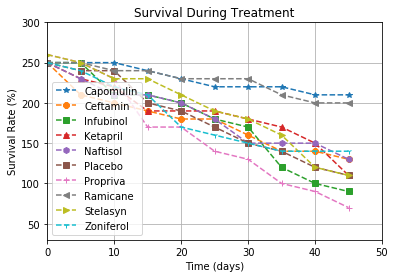

In [34]:
# Generate the Plot (Accounting for percentages)

plt.plot(np.arange(0, 50, 5), 100*mice_df.loc["Capomulin", "Mouse Count"]/10,
         marker = '*', label = "Capomulin", linestyle ='--')
plt.plot(np.arange(0, 50, 5), 100*mice_df.loc["Ceftamin", "Mouse Count"]/10,
         marker = '8', label = "Ceftamin", linestyle ='--')
plt.plot(np.arange(0, 50, 5), 100*mice_df.loc["Infubinol", "Mouse Count"]/10,
         marker = 's', label = "Infubinol", linestyle ='--')
plt.plot(np.arange(0, 50, 5), 100*mice_df.loc["Ketapril", "Mouse Count"]/10,
         marker = '^', label = "Ketapril", linestyle = '--')
plt.plot(np.arange(0, 50, 5), 100*mice_df.loc["Naftisol", "Mouse Count"]/10,
         marker = 'h', label = "Naftisol", linestyle ='--')
plt.plot(np.arange(0, 50, 5), 100*mice_df.loc["Placebo", "Mouse Count"]/10,
         marker = 's', label = "Placebo", linestyle ='--')
plt.plot(np.arange(0, 50, 5), 100*mice_df.loc["Propriva", "Mouse Count"]/10,
         marker = '+', label = "Propriva", linestyle ='--')
plt.plot(np.arange(0, 50, 5), 100*mice_df.loc["Ramicane", "Mouse Count"]/10,
         marker = '<', label = "Ramicane", linestyle = '--')
plt.plot(np.arange(0, 50, 5), 100*mice_df.loc["Stelasyn", "Mouse Count"]/10,
         marker = '>', label = "Stelasyn", linestyle ='--')
plt.plot(np.arange(0, 50, 5), 100*mice_df.loc["Zoniferol", "Mouse Count"]/10,
         marker = '1', label = "Zoniferol", linestyle ='--')

# Add legend
plt.legend(loc="best")

# Add gridlines
plt.grid(alpha = 1)

# Add labels
plt.title('Survival During Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Survival Rate (%)')

# Add x limits and y limits
plt.xlim(0,50)
plt.ylim(30,300)

plt.savefig("Survival_During_Treatment.png")

# Plot the graph
plt.show()

In [37]:
# Calculate the percent changes for each drug
start_volumes = merged_data.loc[(merged_data["Timepoint"] == 0), ["Drug", "Tumor Volume (mm3)"]]
start_vol = start_volumes.groupby("Drug")["Tumor Volume (mm3)"].sum()

end_vol = pd.DataFrame(columns = ['Drug', 'Tumor Volume (mm3)'])

for mouse in mouse_df["Mouse ID"]:
    max_time = merged_data.loc[merged_data["Mouse ID"] == mouse, "Timepoint"].max()
    end_volume = merged_data.loc[(merged_data["Timepoint"] == max_time) & (merged_data["Mouse ID"] == mouse),
                                ["Drug", "Tumor Volume (mm3)"]]    
    
    end_vol = pd.concat([end_vol, end_volume])

start_end_grouped = end_vol.groupby("Drug")["Tumor Volume (mm3)"].sum()

vol_change = 100*(start_end_grouped - start_vol)/start_vol

print(vol_change)

Drug
Capomulin   -18.516516
Ceftamin     28.342171
Infubinol    30.442222
Ketapril     39.569314
Naftisol     36.012793
Placebo      34.463143
Propriva     26.580767
Ramicane    -19.574688
Stelasyn     35.827583
Zoniferol    31.513906
Name: Tumor Volume (mm3), dtype: float64


In [38]:
###### I just realized that the assignment instructions call for analysis of just 
###### 4 treatments(Capomulin, Infubinol, Ketapril, and Placebo) data prior to this cell includes
###### all treatments

In [45]:
# Create bar graph that compares the total % tumor volume change for each drug across the full 45 days.
# Formula below for bar labels and percentages was taken from 
# http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/

def autolabel(rects, ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        
        label_position = height/2

        ax.text(rect.get_x() + rect.get_width()/2., label_position,str('%d' % int(height)) + '%',
                ha='center', va='bottom', color = 'k', size = 10)

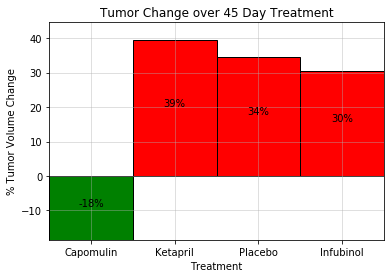

In [49]:
#  Plot the bar chart for percent change
fig, ax = plt.subplots()

x_axis = np.arange(0,4,1)
heights = [vol_change["Capomulin"], vol_change["Ketapril"], vol_change["Placebo"], vol_change["Infubinol"]]
labels = ["Capomulin", "Ketapril", "Placebo", "Infubinol"]
colors = []

# If the change in volume is positive, assign the color red, else green
for vols in heights:
    if vols >= 0:
        colors.append('r')
    else:
        colors.append('g')

barplot = ax.bar(x_axis, heights, width = 1, align='center', color = colors,
                 tick_label = labels, edgecolor = 'black', linewidth = 1)

# Add labeling
ax.set_title("Tumor Change over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.set_xlabel("Treatment")

# Add Gridlines
ax.grid(alpha = 0.50)

# Adjust axis
ax.set_xlim(-.5,3.5)
ax.set_ylim(min(heights), max(heights)+5)

# Add labels for the percentages
autolabel(barplot, ax)

plt.show()